# Capstone project-HR Employee Attrition- RandomForest

In [1]:
###### Reading the data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_cap = pd.read_csv("HR_Employee_Attrition_Data.csv")

In [3]:
data_cap.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#checking the shape of the data
data_cap.shape

(2940, 35)

In [5]:
#checking for dtypes
data_cap.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Exploratory data analysis

In [6]:
#check if there are any null values
data_cap.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


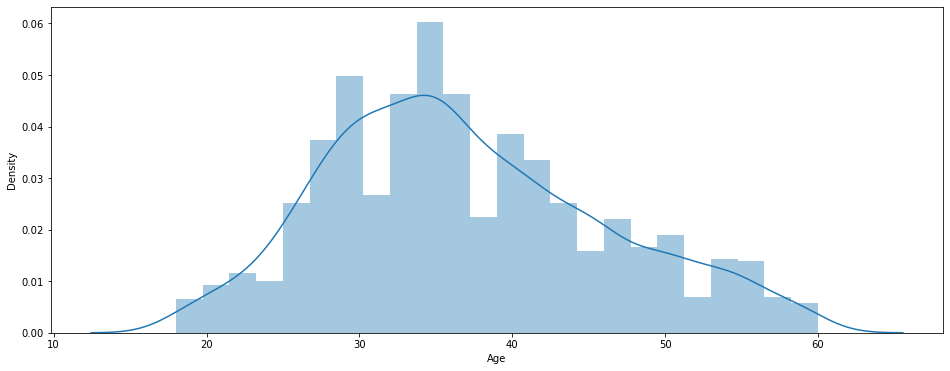

In [7]:
#plot the Age distribution
plt.figure(figsize = (16,6))
sns.distplot(data_cap['Age'])
plt.show()

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


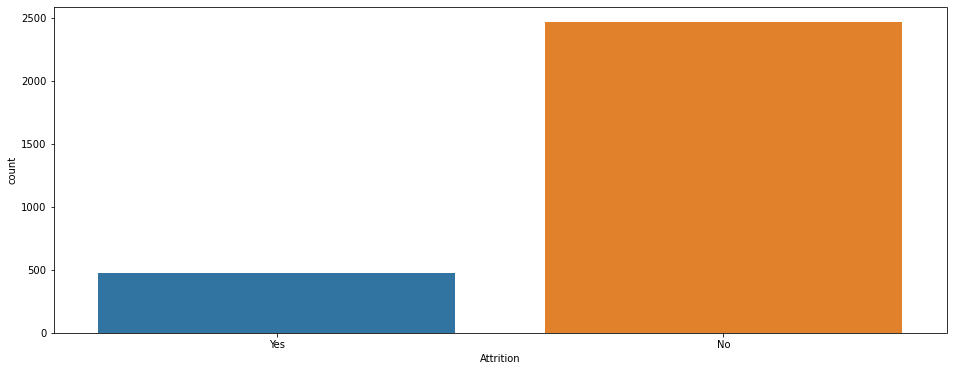

In [8]:
# Plot count of Attrition
plt.figure(figsize = (16,6))
sns.countplot('Attrition', data = data_cap)
plt.show()

In [9]:
#Calculate the attrition percentage
print("Attrition % in the org is::",(data_cap['Attrition'].value_counts()['Yes']/data_cap['Attrition'].count())*100)


Attrition % in the org is:: 16.122448979591837


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


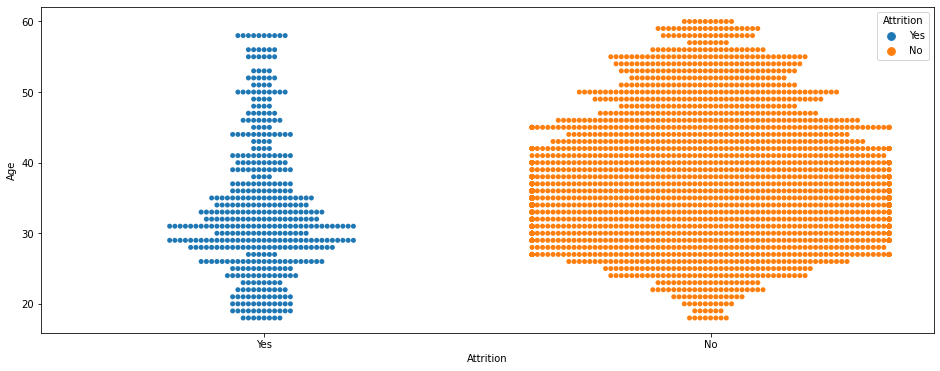

'"From the below plot we can see that there is NO linear relation between \'Age\' and \'Attrition\', \nbut bulk of the attrition is happening between the age groups of \'25-32\''

In [10]:
#Check to see if there is any relation b/w Age and Attrition
plt.figure(figsize = (16,6))
sns.swarmplot(y = 'Age', x = 'Attrition', data = data_cap, hue = 'Attrition')
plt.show()
""""From the below plot we can see that there is NO linear relation between 'Age' and 'Attrition', 
but bulk of the attrition is happening between the age groups of '25-32'"""

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64


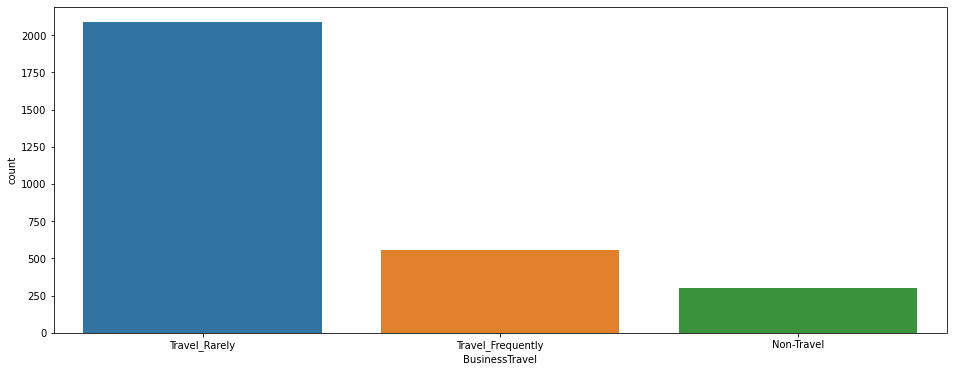

In [11]:
#Plotting the count by business travel
plt.figure(figsize = (16,6))
print(data_cap['BusinessTravel'].value_counts())
sns.countplot(x= 'BusinessTravel', data = data_cap)
plt.show()

In [12]:
#creating a new variable 'cat_BusinessTravel' . Converting into a categorical variable
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Travel = 3
data_cap.loc[data_cap['BusinessTravel'] == 'Travel_Rarely','cat_BusinessTravel'] = 1
data_cap.loc[data_cap['BusinessTravel'] == 'Travel_Frequently','cat_BusinessTravel'] = 2
data_cap.loc[data_cap['BusinessTravel'] == 'Non-Travel','cat_BusinessTravel'] = 3
data_cap.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,2.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,80,0,7,3,3,0,0,0,0,1.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,80,0,8,3,3,8,7,3,0,2.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,80,1,6,3,3,2,2,2,2,1.0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,80,0,8,2,2,7,7,3,6,2.0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,...,80,3,12,3,2,1,0,0,0,1.0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,...,80,1,1,2,3,1,0,0,0,1.0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,...,80,0,10,2,3,9,7,1,8,2.0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,...,80,2,17,3,2,7,7,7,7,1.0


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


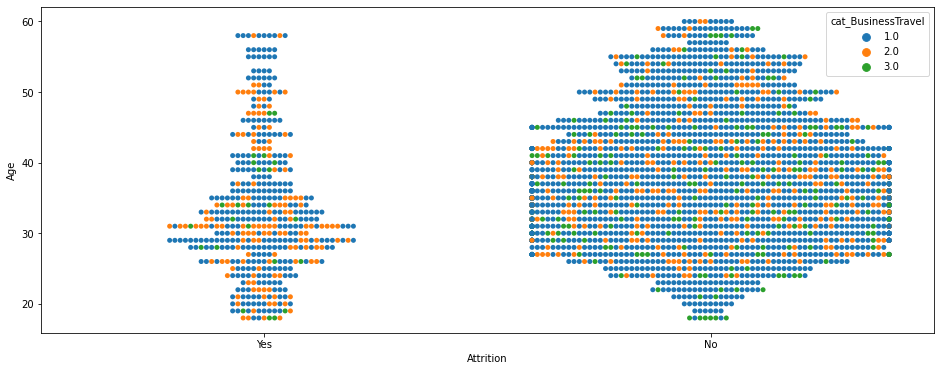

'From the below plot we can see that attrition is higher for employees in age bracket of [25-32].\nAlso, in this age group employees are travelling more'

In [13]:
#Plotting Attrition for Age and business travel
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Travel = 3
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Attrition', y='Age',  data = data_cap, hue = 'cat_BusinessTravel')
plt.show()

#Insight 1
"""From the below plot we can see that attrition is higher for employees in age bracket of [25-32].
Also, in this age group employees are travelling more"""

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


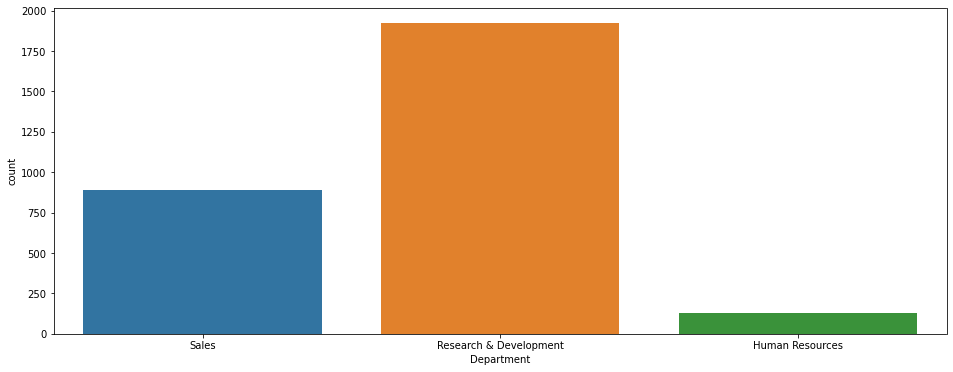

In [14]:
#Plotting counts for department
print(data_cap['Department'].value_counts())
plt.figure(figsize = (16,6))
sns.countplot(data_cap['Department'])
plt.show()

In [15]:
#converting 'Department' data to ordinal variable
#Sales = 1
#Research and Development = 2
#Human Resorces = 3
data_cap.loc[data_cap['Department'] == 'Sales', 'ord_Department'] = 1
data_cap.loc[data_cap['Department'] == 'Research & Development', 'ord_Department'] = 2
data_cap.loc[data_cap['Department'] == 'Human Resources', 'ord_Department'] = 3


In [16]:
#Getting the count of Business travel based on Department
#HR
departmentgrp = data_cap.groupby(by = 'Department')

df1 = departmentgrp.get_group('Human Resources')['BusinessTravel'].value_counts()
df1 = pd.DataFrame(df1)
df1 = df1.reset_index()
df1['Department'] = 'HR'
df1

,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR


In [17]:
#R&D
df2 = departmentgrp.get_group('Research & Development')['BusinessTravel'].value_counts()
df2 = df2.to_frame().reset_index()
df2['Department'] = 'R&D'
#df2.loc[df2['Department'] != 'HR', 'Department'] = 'R&D' 
df3 = df1.append(df2, ignore_index=True)
df3


,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR
3,Travel_Rarely,1364,R&D
4,Travel_Frequently,364,R&D
5,Non-Travel,194,R&D


In [18]:
df2 = departmentgrp.get_group('Sales')['BusinessTravel'].value_counts()
df2 = df2.to_frame().reset_index()
df2['Department'] = 'Sales'
df4 = df3.append(df2, ignore_index=True)
df4

,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR
3,Travel_Rarely,1364,R&D
4,Travel_Frequently,364,R&D
5,Non-Travel,194,R&D
6,Travel_Rarely,630,Sales
7,Travel_Frequently,168,Sales
8,Non-Travel,94,Sales


In [19]:
#Calculating % of frequent travel employees in Sales and R&D
print("% of frequent travel in Sales is::",(df4.loc[((df4['Department'] == 'Sales') & (df4['index'] == 'Travel_Frequently')),'BusinessTravel'].sum())/(df4.loc[df4['Department'] == 'Sales', 'BusinessTravel'].sum()))
print("% of frequent travel in R&D is ::",(df4.loc[((df4['Department'] == 'R&D') & (df4['index'] == 'Travel_Frequently')),'BusinessTravel'].sum())/(df4.loc[df4['Department'] == 'R&D', 'BusinessTravel'].sum()))


% of frequent travel in Sales is:: 0.18834080717488788
% of frequent travel in R&D is :: 0.18938605619146723


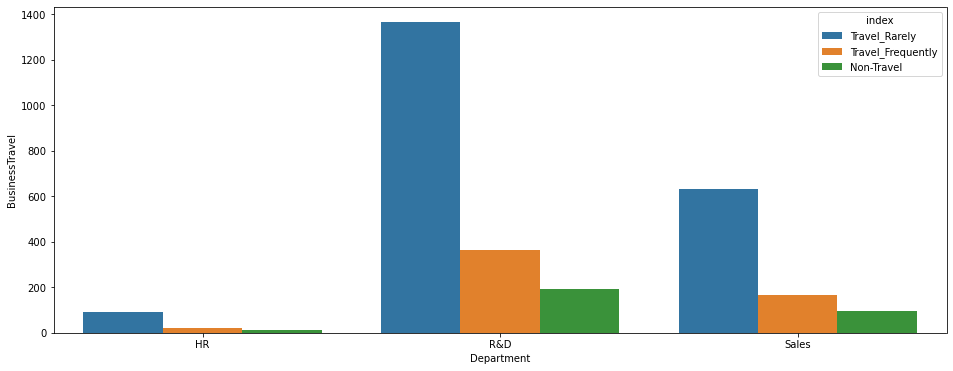

In [20]:
#plotting department data against travel
plt.figure(figsize = (16,6))
sns.barplot(x= 'Department', y = 'BusinessTravel' , data = df4, hue = 'index')
plt.show()

In [21]:
##Calculating attrition % for each department
#Sales
attrbysales = departmentgrp.get_group('Sales')['Attrition'].value_counts()
#HR
attrbyHR = departmentgrp.get_group('Human Resources')['Attrition'].value_counts()
#RnD
attrbyRnD = departmentgrp.get_group('Research & Development')['Attrition'].value_counts()
attrbydept = pd.DataFrame(columns = ['Department', 'Attrition'])
#attrbydept.reset_index(inplace = True)
attrbydept.loc[len(attrbydept)] = ["Sales", attrbysales['Yes']/(attrbysales.sum())*100]
attrbydept.loc[len(attrbydept)] = ["HR",(attrbyHR['Yes']/attrbyHR.sum())*100]
attrbydept.loc[len(attrbydept)] = ["R&D",(attrbyRnD['Yes']/attrbyRnD.sum())*100]
attrbydept

#Insight 2
"""Attrition is highest in Sales team closely followed by HR team"""

'Attrition is highest in Sales team closely followed by HR team'

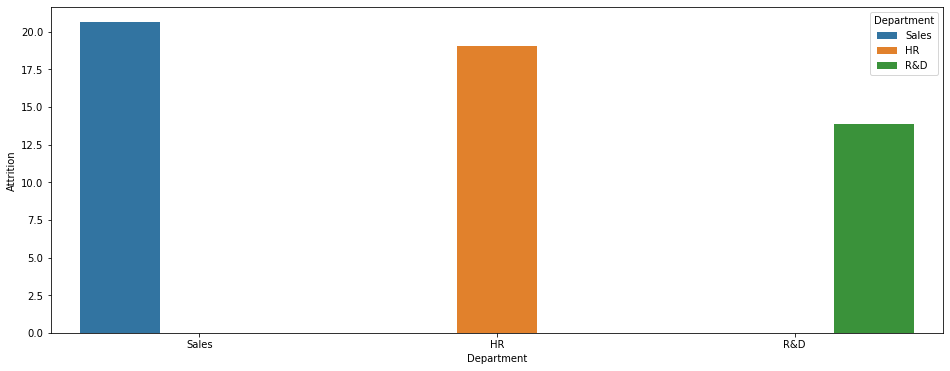

In [22]:
#Plotting Attrition% for each department
plt.figure(figsize = (16,6))
sns.barplot(x= 'Department', y = 'Attrition' , data = attrbydept, hue = 'Department')
plt.show()

In [23]:
##Calculating attrition vs EnvironmentSatisfaction level
envsatisfcationgrp = data_cap.groupby(['EnvironmentSatisfaction','Attrition'])
envsatisfcationgrp.groups.keys()



dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [24]:
count = envsatisfcationgrp.get_group((1, 'Yes'))['EnvironmentSatisfaction'].count()
count
AttrperEnvSat = pd.DataFrame(columns = ['EnvironmentSatisfaction', 'Attrition', 'Count'])
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['1', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144


In [25]:
count = envsatisfcationgrp.get_group((2, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['2', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86


In [26]:
count = envsatisfcationgrp.get_group((3, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['3', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86
2,3,Yes,124


In [27]:
count = envsatisfcationgrp.get_group((4, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['4', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86
2,3,Yes,124
3,4,Yes,120


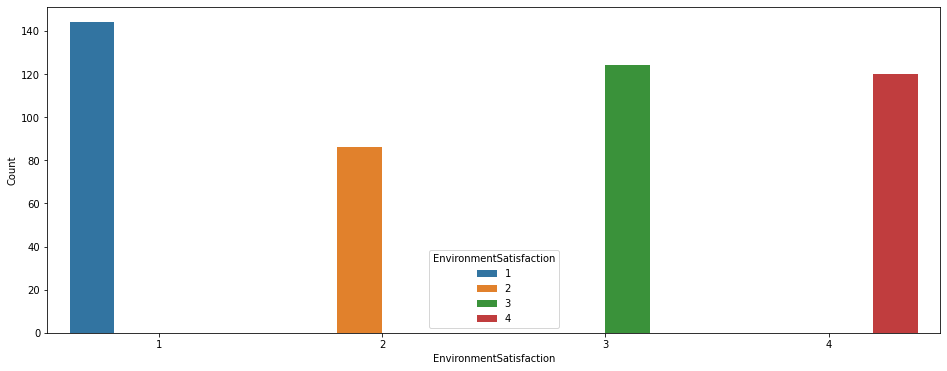

"Attrition is highest for group that has EnvironmentSatisfaction of '1', but for level '3' and '4' its high as well."

In [28]:
#Plotting Attrition vs Environmentsatisfaction
plt.figure(figsize = (16,6))
sns.barplot(x= 'EnvironmentSatisfaction', y = 'Count' , data = AttrperEnvSat, hue = 'EnvironmentSatisfaction')
plt.show()

#Insight3
"""Attrition is highest for group that has EnvironmentSatisfaction of '1', but for level '3' and '4' its high as well."""

In [29]:
#Attrition by gender
AttrGender = data_cap.groupby(['Attrition', 'Gender'])
AttrGender.groups.keys()

dict_keys([('No', 'Female'), ('No', 'Male'), ('Yes', 'Female'), ('Yes', 'Male')])

In [30]:
AttrperGend = pd.DataFrame(columns = ['Gender', 'Attrition', 'Count'])
AttrperGend

,Gender,Attrition,Count


In [31]:
count = AttrGender.get_group(('Yes', 'Female'))['Attrition'].count()
AttrperGend.loc[len(AttrperGend)] = ['Female', 'Yes', count]
AttrperGend

,Gender,Attrition,Count
0,Female,Yes,174


In [32]:
count = AttrGender.get_group(('Yes', 'Male'))['Attrition'].count()
AttrperGend.loc[len(AttrperGend)] = ['Male', 'Yes', count]
AttrperGend

,Gender,Attrition,Count
0,Female,Yes,174
1,Male,Yes,300


In [33]:
data_cap['Gender'].value_counts()
#plt.figure(figsize = (16,6))
#sns.barplot(x= 'Gender', y = 'Count' , data = AttrperGend, hue = 'Gender')

Male      1764
Female    1176
Name: Gender, dtype: int64

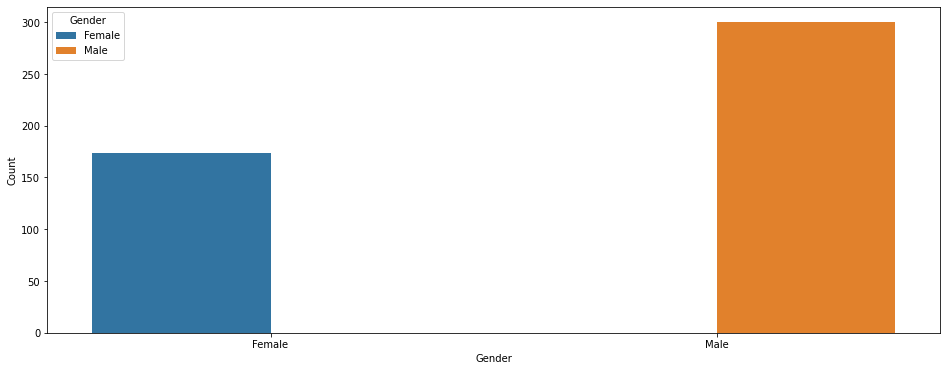

"Out of total people who have left, Male's have higher attrition numbers"

In [34]:
#Plotting Attrition vs Gender
plt.figure(figsize = (16,6))
sns.barplot(x= 'Gender', y = 'Count' , data = AttrperGend, hue = 'Gender')
plt.show()

#Insight 4
"""Out of total people who have left, Male's have higher attrition numbers"""

In [35]:
#Attrition by job level

In [36]:
attrbyJoblvl = data_cap.groupby(['JobLevel', 'Attrition'])
attrbyJoblvl.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes'), (5, 'No'), (5, 'Yes')])

In [37]:
count = attrbyJoblvl.get_group((1, 'Yes'))['Attrition'].count() 
count

286

In [38]:
attrvsJoblvl = pd.DataFrame(columns = ['JobLevel', 'Attrition', 'count', 'Attr%'])
attrvsJoblvl

,JobLevel,Attrition,count,Attr%


In [39]:
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['1', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[1])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175


In [40]:
count = attrbyJoblvl.get_group((2, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['2', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[2])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828


In [41]:
count = attrbyJoblvl.get_group((3, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['3', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[3])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899


In [42]:
count = attrbyJoblvl.get_group((4, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['4', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[4])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899
3,4,Yes,10,4.716981


In [43]:
count = attrbyJoblvl.get_group((5, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['5', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[5])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899
3,4,Yes,10,4.716981
4,5,Yes,10,7.246377


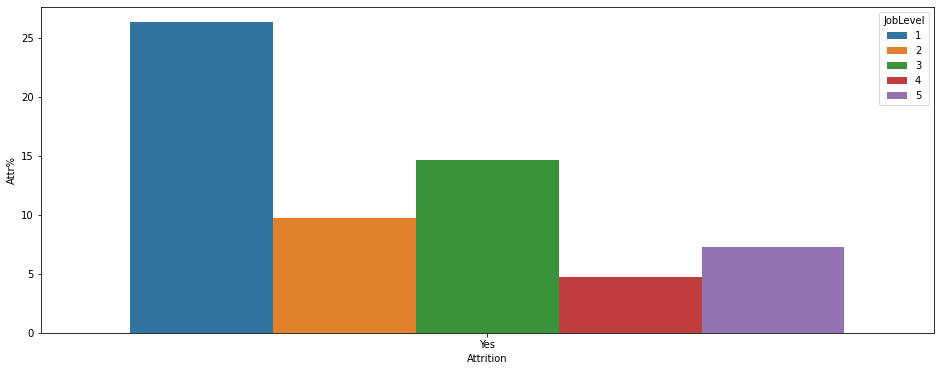

'Attrition % is highest in Job level 1, followed by job level 3'

In [44]:
#Plotting Attrition vs Job Level
plt.figure(figsize = (16,6))
sns.barplot(x= 'Attrition', y = 'Attr%' , data = attrvsJoblvl, hue = 'JobLevel')
plt.show()

#Insight 5
"""Attrition % is highest in Job level 1, followed by job level 3"""

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


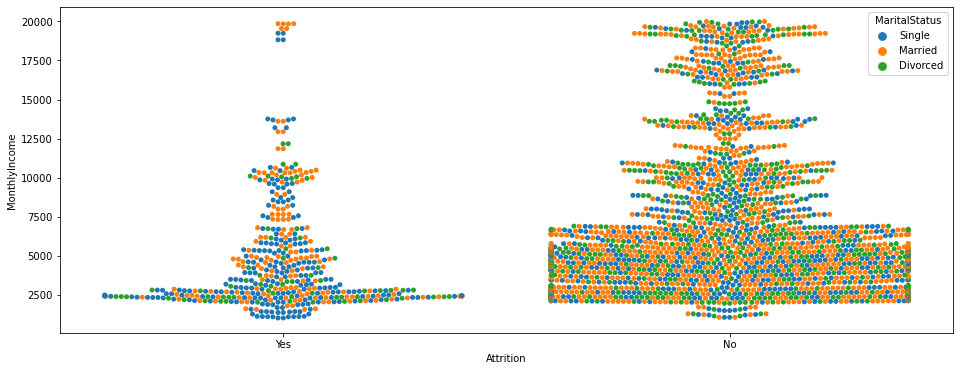

'Attrition is highest amount employees who are earning between (2500-5000)'

In [45]:
#Plotting Attrition vs monthly income
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Attrition', y = 'MonthlyIncome' , data = data_cap, hue= 'MaritalStatus')
plt.show()

#Insight 6
"""Attrition is highest amount employees who are earning between (2500-5000)"""


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\abhis\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\abhis\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\abhis\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


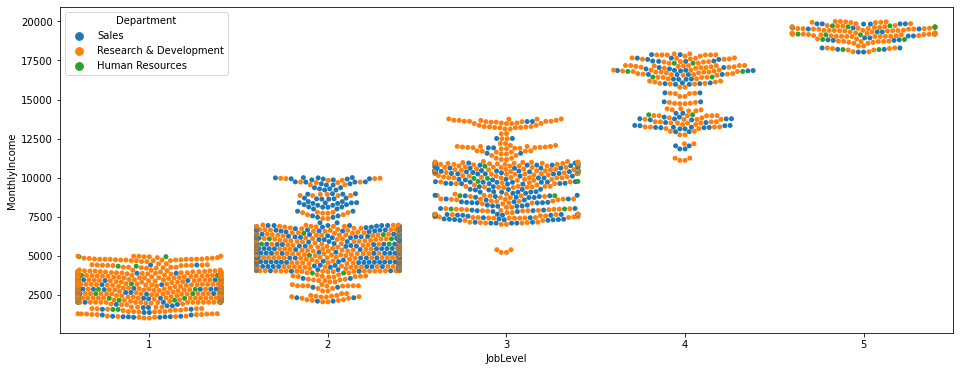

In [46]:
#Plotting Joblevel vs monthly income
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'JobLevel', y = 'MonthlyIncome' , data = data_cap, hue= 'Department')
plt.show()

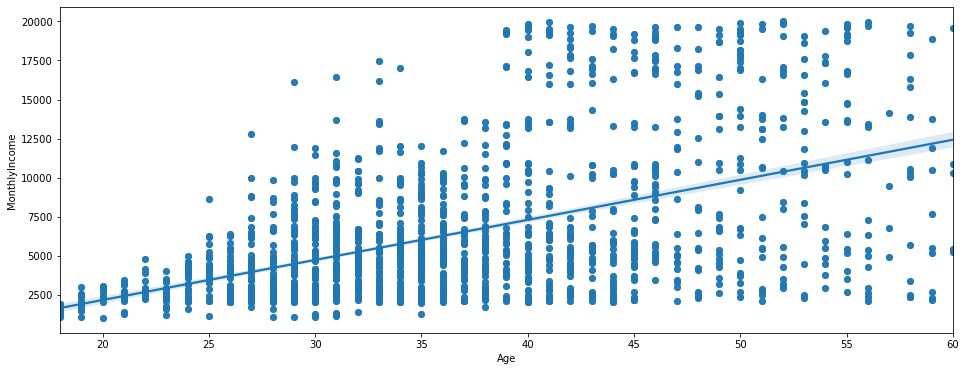

'There is a linear relation between Age and Monthly income'

In [47]:
#Plotting Age vs monthly income
plt.figure(figsize = (16,6))
sns.regplot(x= 'Age', y = 'MonthlyIncome' , data = data_cap)
plt.show()

#Insight 7
"""There is a linear relation between Age and Monthly income"""

In [48]:
data_cap.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel,ord_Department
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,1.0,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,2.0,2.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,0,7,3,3,0,0,0,0,1.0,2.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,0,8,3,3,8,7,3,0,2.0,2.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,1,6,3,3,2,2,2,2,1.0,2.0


In [49]:
#Analyzing salary hike
data_cap['PercentSalaryHike'].describe()

count    2940.000000
mean       15.209524
std         3.659315
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


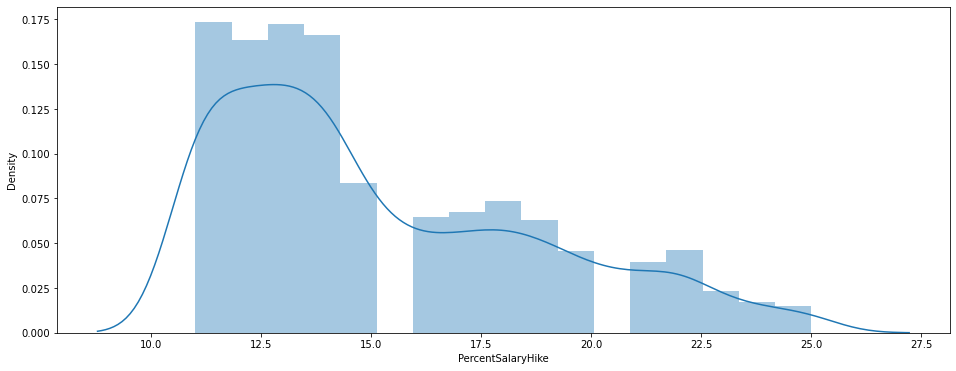

'The salary hike histogram is skewed to the right'

In [50]:
#Plotting histogram of Hike%
plt.figure(figsize = (16,6))
sns.distplot(data_cap['PercentSalaryHike'], kde = True)
plt.show()

#Insight 8
"""The salary hike histogram is skewed to the right""" 

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


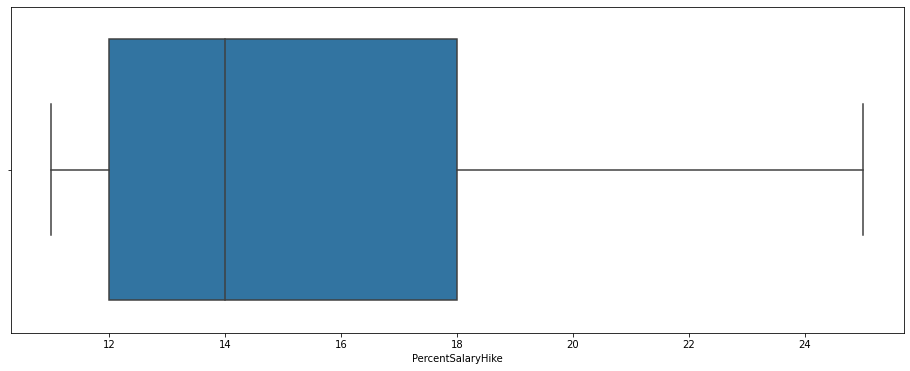

'The median salary hike is 14% and the mean is 15%. The highest salary hike given is 25%'

In [51]:
#Plotting box plot for salary hike
plt.figure(figsize = (16,6))
sns.boxplot('PercentSalaryHike', data = data_cap)
plt.show()

#Insight 8
"""The median salary hike is 14% and the mean is 15%. The highest salary hike given is 25%""" 

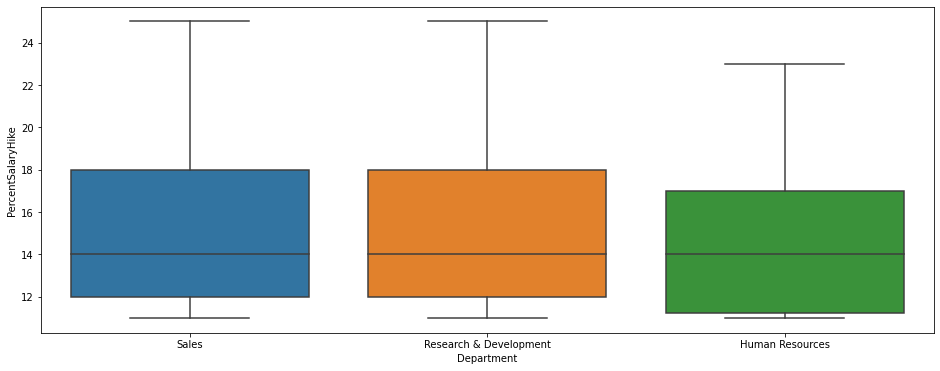

In [52]:
#Plotting hike% for each department
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'Department', data = data_cap)
plt.show()

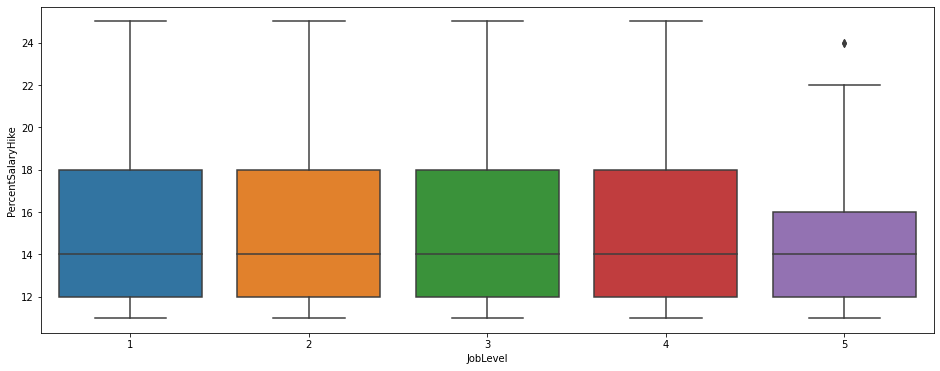

In [53]:
#Plotting hike% for each job level
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'JobLevel', data = data_cap)
plt.show()

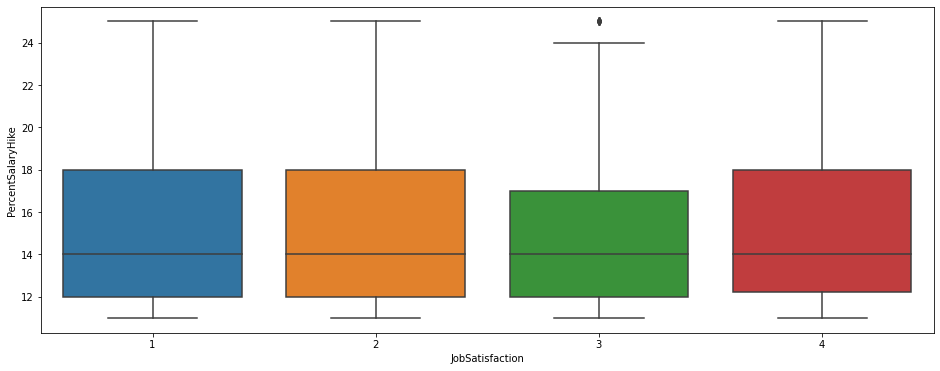

In [54]:
#Plotting hike% for each job satisfaction level
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'JobSatisfaction', data = data_cap)
plt.show()

In [55]:
grp2 = data_cap.groupby(['JobSatisfaction', 'Attrition'])
grp2.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [56]:
count = grp2.get_group((1, 'Yes'))['Attrition'].count()
count

132

In [57]:
attrbyJobsat = pd.DataFrame(columns = ['Jobsat','Attrition','Count', 'Attr%'])
attrbyJobsat.loc[len(attrbyJobsat)] = ['1', 'Yes', count, count/data_cap['JobSatisfaction'].value_counts()[1]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.83737


In [58]:
count = grp2.get_group((2, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['2', 'Yes', count, count/data_cap['JobSatisfaction'].value_counts()[2]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571


In [59]:
count = grp2.get_group((3, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['3', 'Yes', count, count/data_cap['JobSatisfaction'].value_counts()[3]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571
2,3,Yes,146,16.515837


In [60]:
count = grp2.get_group((4, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['4', 'Yes', count, count/data_cap['JobSatisfaction'].value_counts()[4]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571
2,3,Yes,146,16.515837
3,4,Yes,104,11.328976


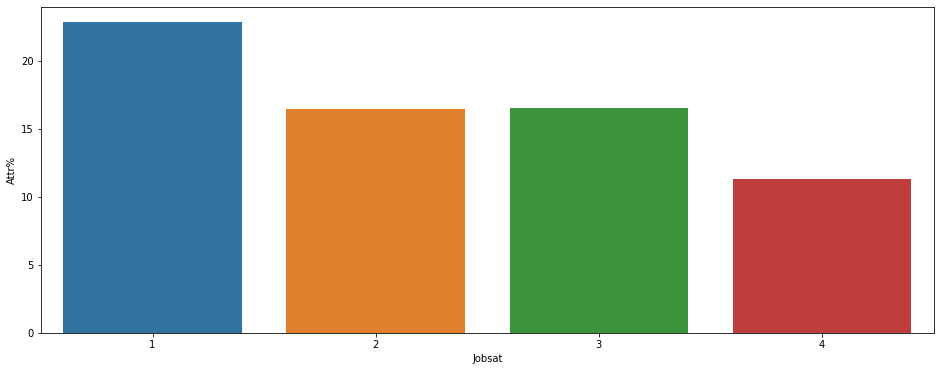

'employees with job satisfaction level of 1 have the highest attrition % of 22.8%'

In [61]:
#Plotting Attr% for Job satisfaction level
plt.figure(figsize = (16,6))
sns.barplot(y = 'Attr%', x = 'Jobsat', data = attrbyJobsat)
plt.show()

#Insight 9
"""employees with job satisfaction level of 1 have the highest attrition % of 22.8%""" 

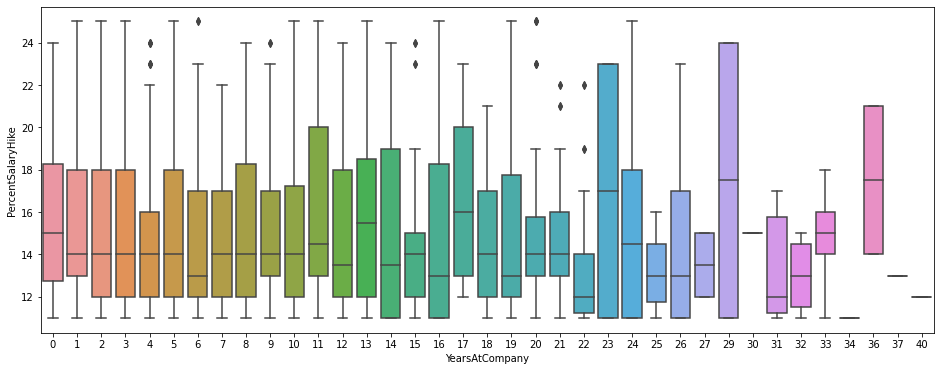

In [62]:
#Plotting hike% for No of years worked
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'YearsAtCompany', data = data_cap)
plt.show()

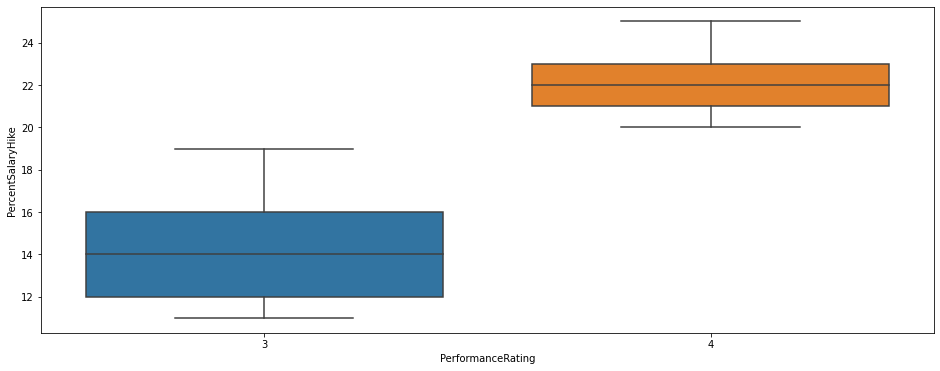

'employees with rating of 4 have got hikes between (20-25), whereas employees with rating of 3 have got between (11-19)'

In [63]:
#Plotting 'Performance rating' and 'hike%'
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'PerformanceRating', data = data_cap)
plt.show()

#Insight 10
"""employees with rating of 4 have got hikes between (20-25), whereas employees with rating of 3 have got between (11-19)""" 

In [64]:
grp1 = data_cap.groupby(['RelationshipSatisfaction', 'Attrition'])
grp1.groups.keys()


dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [65]:
count = grp1.get_group((1, 'Yes'))['Attrition'].count()
count

114

In [66]:
attrbyrelsat = pd.DataFrame(columns = ['Relsat', 'Attrition', 'Count', 'Attr%'])
attrbyrelsat

,Relsat,Attrition,Count,Attr%


In [67]:
attrbyrelsat.loc[len(attrbyrelsat)] = ['1', 'Yes', count, count/data_cap['RelationshipSatisfaction'].value_counts()[1]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174


In [68]:
count = grp1.get_group((2, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['2', 'Yes', count,count/data_cap['RelationshipSatisfaction'].value_counts()[2]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485


In [69]:
count = grp1.get_group((3, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['3', 'Yes', count, count/data_cap['RelationshipSatisfaction'].value_counts()[3]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485
2,3,Yes,142,15.468410


In [70]:
count = grp1.get_group((4, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['4', 'Yes', count, count/data_cap['RelationshipSatisfaction'].value_counts()[4]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485
2,3,Yes,142,15.468410
3,4,Yes,128,14.814815


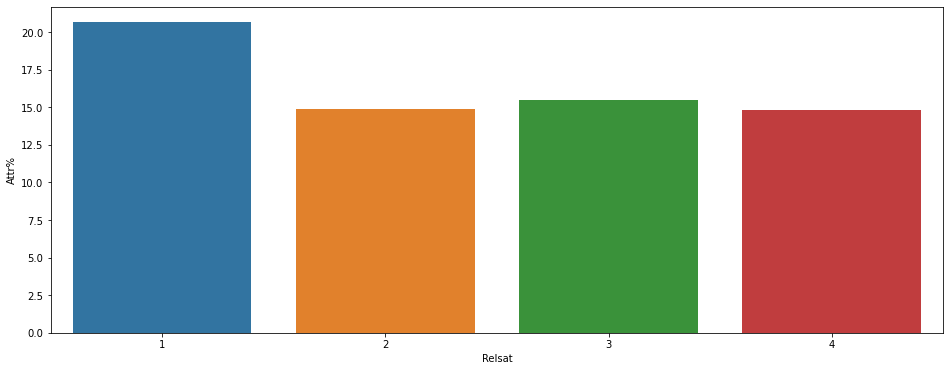

'employees with relation satisfaction of 1 have highest attrition numbers at 20.65%.'

In [71]:
plt.figure(figsize = (16,6))
sns.barplot(y = 'Attr%', x = 'Relsat', data = attrbyrelsat)
plt.show()

#Insight 11
"""employees with relation satisfaction of 1 have highest attrition numbers at 20.65%.""" 